<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN

_Authors: Matt Brems (DC), Riley Dallas (AUS)_

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris, load_wine
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Where `DBSCAN` shines
---

`DBSCAN` does really well when there is clear "separation" within your dataset. `load_iris` is a good example of this, because one of the species is an island unto itself.

**In the cell below, load the iris dataset into a `pandas` DataFrame. Ignore the species.**

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Preprocessing: `StandardScaler`
---

Because clustering models are based on distance, we don't want the magnitude of our features to affect the algorithm. Therefore, when clustering **you should always scale your data**.

Create `X_scaled` using an instance of `StandardScaler` in the cell below.

In [3]:
ss = StandardScaler()
X_scaled = ss.fit_transform(df)

## `DBSCAN`
---

Fit an instance of `DBSCAN` to `X_Scaled`. Use the default parameters for now (we'll tune them in a minute).

In [4]:
dbscan = DBSCAN()
dbscan.fit(X_scaled);

## Model Evaluation: Silhouette score
---

Recall the formula for Silhouette score:

### $s_i = \frac{b_i - a_i}{max\{a_i, b_i\}}$

Where:
- $a_i$ = Cohesion: Average distance of points within clusters
- $b_i$ = Separation: Average distance from point $x_i$ to all points in the next nearest cluster.

In the cell below, use the `silhouette_score` function from `sklearn` to evaluate our `DBSCAN` model.

In [5]:
silhouette_score(X_scaled, dbscan.labels_)

0.35651648142700726

## EDA: `pairplot`
---

Now let's view our clusters using `seaborn`'s `pairplot` method. 

1. First, you'll need to assign the clusters (`dbscan.labels_`) to your original DataFrame.
2. Then you'll create a `pairplot` using the `cluster` column as the hue

In [6]:
df['cluster'] = dbscan.labels_

In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparam

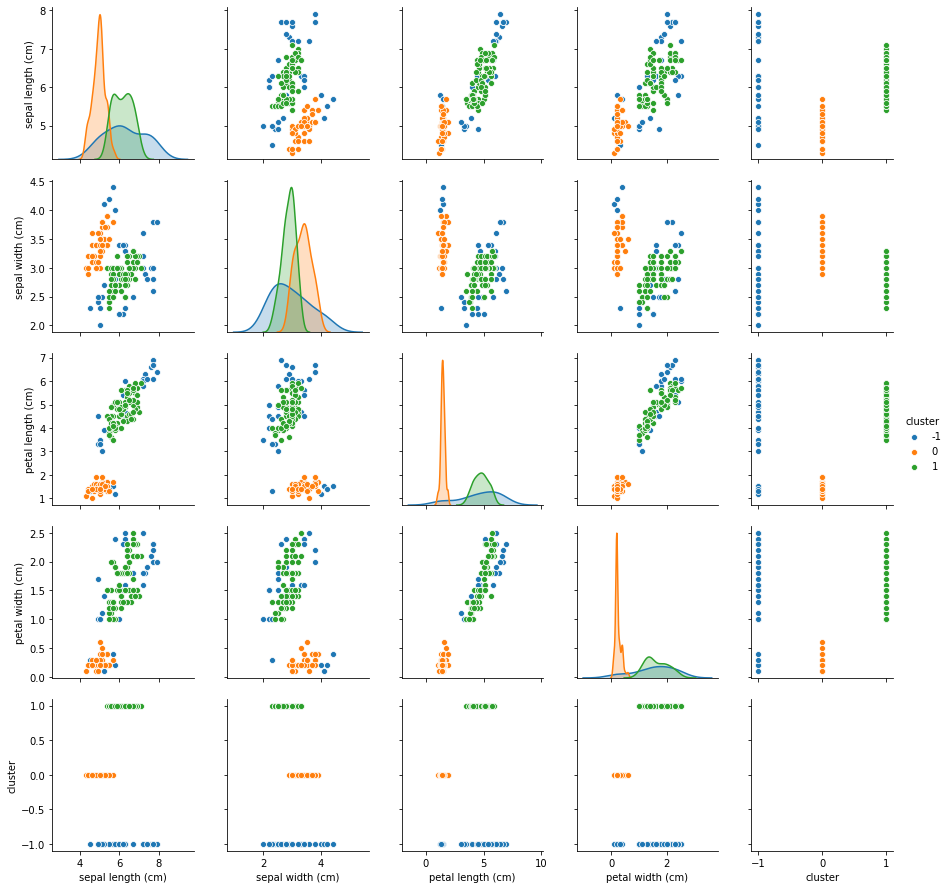

In [7]:
sns.pairplot(df, hue='cluster')

## Where `DBSCAN` does poorly
---

`DBSCAN` is dependent on two things:

1. Consistent density (one `eps` to rule them all)
2. Clear separation of the clusters within your dataset

The `load_wine` dataset is more or less clumped together, which makes it a great dataset for exposing one of the weaknesses of `DBSCAN`: no clear separation.

In the cell below, load the wine dataset into a `pandas` DataFrame. Ignore the target.

In [8]:
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

## Preprocessing: `StandardScaler`
---

Because clustering models are based on distance, we don't want the magnitude of our features to affect the algorithm. Therefore, when clustering **you should always scale your data**.

Create `X_scaled` using an instance of `StandardScaler` in the cell below.

In [9]:
X_scaled = StandardScaler().fit_transform(wine_df)

## `DBSCAN`
---

Fit an instance of `DBSCAN` to `X_Scaled`. Finding the right values for `eps` and `min_samples` can take a while, so to save on time we'll use the following parameters:

- 2.3 for `eps`
- 4 for `min_samples`

In [10]:
dbscan = DBSCAN(eps=2.3, min_samples=4)
dbscan.fit(X_scaled)
set(dbscan.labels_)

{-1, 0, 1}

## Model evaluation
---

Calculate the silhouette score for our instance of `DBSCAN` in the cell below.

In [11]:
silhouette_score(X_scaled, dbscan.labels_)

0.1971962127390583

## EDA
---

It's not practical to create a `pairplot` because the wine dataset has several features. We'll try some different techniques in a bit.

In the cell below, create a `cluster` column using `dbscan.labels_`.

In [12]:
# Create cluster column
wine_df['cluster'] = dbscan.labels_

In [13]:
# Value counts for each cluster
wine_df['cluster'].value_counts()

 0    99
 1    43
-1    36
Name: cluster, dtype: int64

## Exploring each cluster
---

Clustering is sort of backwards: We fit a model, **then** we do EDA on each cluster. You can go one of two routes:

1. Break each cluster into its own DataFrame
2. Use `.groupby()` extensively

In the cell below, use `.groupby()` in conjunction with `.mean()` and see if you spot any defining characteristics.

In [14]:
wine_df.groupby('cluster').mean().T[[0,1]]

cluster,0,1
alcohol,13.084545,13.162326
malic_acid,1.862727,3.317907
ash,2.353636,2.401860
alcalinity_of_ash,18.564646,21.046512
magnesium,98.959596,99.325581
total_phenols,2.558889,1.622791
flavanoids,2.572525,0.792558
nonflavanoid_phenols,0.318990,0.441395
proanthocyanins,1.708889,1.112791
color_intensity,4.393838,7.214419
